# **Comparative analysis of FINBERT, BERT and traditional models of classification**

We are conducting a comaparative analysis of pretrained FINBERT, pretrained BERT and traditional models viz., logistic regression and support vector classification to find the best model for identifying and predicting the sentiment of text. 

We will start by looking at the Sentences_50Agree.csv file (renamed as data1.csv) , which is a sentiment dataset of sentences from financial news consisting of 4840 sentences from English language financial news categorised by sentiment (positive, negative, and neutral). It is divided by agreement rate of 5-8 annotators. We are performing sentiment analysis to aid the stock investment decision making by identifying the sentiment of the financial phrase. 

If the sentiment of the phrase is positive it means that an invester can consider investing in stock market, if negative then invester must refrain investing and if sentiment is neutral then further investigation is suggested.

In this notebook, we are training the FINBERT model. We have split the dataset into train, test and validation using stratified sampling. This can allows us to take representative of the sample in three datasets and compare results of this model with other models. 

In [ ]:
!pip uninstall transformers                       # installing libraries (TRANSFORMERS for BERT) 
!pip install --upgrade transformers==4.28.0
#note: when uninstalling existing transformers it may ask to answer y/n. Input response y to proceed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.9 MB/s eta 0:00:00


In [ ]:

!pip install numpy==1.19.5
!pip install torch==1.7.1
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 87.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.7 MB/s eta 0:00:00


**transformers**: This package provides an interface pretrained BERT and FINBERT models to perform sentiment analysis.  

**numpy**: It is a powerful tool to deal with data preprocessing, handling input arrays, multidimensional data and performs mathematical computations efficiently.

**torch**: Also known as PyTorch, is a open-source machine learning library. AS BERT and FINBERT models are built using deep learning architechture, PyTorch is commonly used in these models.

**scikit-learn**: provides tools and algorithms in machine learning and helps in tasks like data preprocessing, feature extraction, model evaluation, and classification and also offers convinient APIs.


**datsets**: The 'datasets' library is a Python package that provides an efficient way to work with various datasets, including text and image datasets. It provides a standardized interface for loading and processing datasets, making it easier to work with different datasets and models.

**Matplotlib**: It is a powerful library in Python used for data visualization. It provides a wide range of tools for creating graphs, plots, charts, and so on.

**Pyplot**: It is a collection of functions in the Matplotlib library. It enables the quick and easy creation of a number of plot types, including line plots, scatter plots, bar plots, and histograms.

**Seaborn**: It is a Python data visualization library based on Matplotlib. Seaborn provides a high-level interface for creating informative and attractive statistical graphics, and it is used to plot the histograms here.

**sklearn.model_selection**: The model_selection module in sklearn library provides several functions for model selection and evaluation.

**sklearn.metrics**: The sklearn.metrics module provides a suite of functions and utilities for evaluating the performance of machine learning models such as: accuracy_score, precision_score, recall_score.

**wordcloud**: It is a Python library used to generate word clouds, which are graphical representations of the most frequent words in a text corpus.

**nltk**: Also known as Natural Language Toolkit. It is a Python library used for working with human language data. It provides a suite of text processing libraries for tokenization, stemming, tagging, parsing, etc.


## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd 
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()      # Check if a CUDA-capable GPU is available

True

## Importing and loading dataset

Function drive.mount() from *'drive'* package is used to gain access to google drive. A window pops on the screen which asks for users permission to gain access to drive. One must make sure they have their dataset uploaded on google drive in folder name 'BERT'.

In [ ]:
#Importing our dataset from google drive 
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'
%pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive


'/content/gdrive/MyDrive'

In [ ]:
%cd BERT

/content/gdrive/MyDrive/BERT


 Dataset is imported using pd.read_csv() function.

In [ ]:
df = pd.read_csv('data1.csv', sep='\t', header=None, encoding='latin-1')
pd.set_option('display.max_colwidth', None) #to enable viewer to read entire text in the column
df.head()

,0
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral"
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .@neutral"
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .@negative"
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .@positive
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .@positive"


In dataset, text@sentiment pattern is visible. We split this dataset using split() function and create two columns.The dataset is spilt into two new columns 'sentence' and 'category'

In [ ]:
# Splitting a column in the DataFrame 'df' into two separate columns
df[['sentence', 'category']] = df[0].str.split('@', expand=True) 
df.drop(0, axis=1, inplace=True)
df.head()

,sentence,category
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",neutral
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",neutral
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",negative
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,positive
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",positive


## Preprocessing: Cleaning, removing stopwords, lemmatization

Next step is cleaning the data to make it suitable to load it in our models. This is an essential step as feeding raw data will not give us good results.

In [ ]:
df = df[~df.category.str.contains('\|')]  # Filtering the DataFrame 'df' to remove rows where the 'category' column contains '|'
df = df[df.category != 'nocode']   ## Filtering the DataFrame 'df' to remove rows where the 'category' column equals 'nocode'

#get value count for each class
df.category.value_counts()

neutral     2879
positive    1363
negative     604
Name: category, dtype: int64

In this step we get rid of all rows which have '|', null values in category column as these are considered irrelevant

In [ ]:
#get unique labels/factors in category column
possible_labels = df.category.unique() 
possible_labels

array(['neutral', 'negative', 'positive'], dtype=object)

There are 3 unique labels, 'neutral', 'negative', 'positive', and stored in variable 'possible_labels'

In [ ]:
label_dict = {}      # Creating an empty dictionary 'label_dict' to store the label-index pairs
for index, possible_label in enumerate(possible_labels):       # Iterating over each label in 'possible_labels'
    label_dict[possible_label] = index   # Adding the label-index pair to the 'label_dict' dictionary

Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
# Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary
df['label'] = df.category.replace(label_dict)  

In [ ]:
df      # labels for neutral is 0 , for negative is 1 , for positive is 2

,sentence,category,label
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",neutral,0
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",neutral,0
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",negative,1
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,positive,2
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",positive,2
...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,negative,1
4842,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",neutral,0
4843,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",negative,1
4844,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",negative,1


In the above three cells first we assign an interger value to each label to make it readable for the model. 
The label values are defined as follows: 
**neutral = 0 , negative = 1 , positive = 2**
A new column 'label' is added to dataset 'df' to assign label corresponding to the value in category column. 'label_dict' takes care of this pairing. 

In [ ]:
df = df.dropna(subset=['sentence', 'label']) ## drop missing values

In [ ]:
# Converting % into percent
df['sentence'] = df['sentence'].str.replace('%', 'percent')

All the '%' symbols are now converted into text 'percent' using str.replace() function.



---

Another way to replace a symbol is explained in next cell. We can define a function to identify the regular expression in the text (here sentence) and its replacement text and then use apply() function to replace the pattern in desired column.

In [ ]:
import re
# Define a function to perform the conversion
def convert_usd(sentence):
    return re.sub(r'\$', 'usd ', sentence)

# Apply the function to the 'Sentence' column
df['sentence'] = df['sentence'].apply(convert_usd)

Since '$' represents currency US dollars we can convert it to 'usd' which is widely used. A function 'convert_usd' is defined to identify pattern using regular expression *r'\$'* and converted to 'usd' using 'apply()' function

In [ ]:
#identifying any html tags in the data
def has_html_tags(text):
    pattern = r"<[^>]+>"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
html_tags = df['sentence'].apply(has_html_tags)
rows_with_html_tags = df[html_tags == True]
print(rows_with_html_tags)


Empty DataFrame
Columns: [sentence, category, label]
Index: []


Any html tags <> in the dataset are identified by defining has_html_tags function. re.search() function will search for pattern * r"<[^>]+>" * and then return True is pattern is identified else False. 

apply() function is used to check in 'sentence' column in dataset 'df' and these values are stored in rows_with_html_tags variable. 

Using print() we see that the dataframe is empty and there are no html tags identified in the dataset 



---


To identify any URL's or web addresses (starting with "http://", "https://", or "www.")  in the dataframe we define function has_urls such that if re.search () function identifies pattern = r"\b(https?://|www\.)\S+\b" in the text it will return value True or False otherwise. 

apply() function is used to check any URL's in 'sentence' column in dataset 'df' and these values are stored in urls_present variable. 

print() function shows rows having URL's.

In [ ]:
# Define a function to check for URLs in a text
def has_urls(text):
    pattern = r"\b(https?://|www\.)\S+\b"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
urls_present = df['sentence'].apply(has_urls)

# Print the rows that contain URLs
print(df[urls_present])


                                                                                                                                                                                                                                                                                               sentence  \
1175                                                                                                                                                                                                     An audio webcast will be available live and archived on Cerner 's Web site at www.cerner.com .   
1320                                                                                                                           Prothious Engineering ( www.prothious.com ) employs more than 1,000 and has a large portfolio of projects and an annual detailing capacity of more than 100,000 tonnes .   
1379                                                                                                   

In [ ]:
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r"\b(https?://|www\.)\S+\b", '', text)

# Remove URLs using the pattern
df['sentence'] = df['sentence'].apply(remove_between_square_brackets)

Now that URL's are iodentified in the data, we remove them by defining a function remove_between_square_brackets to identify the pattern and replacing it with empty string. URL's are effectively removed from 'sentence' column of 'df'  dataframe.

In [ ]:
# printed row 4140 to verify the removal of URL's and similar patterns
df.loc[4140]

sentence    The terms and conditions of the Stock Option Scheme 2008 are available on the Company 's internet pages  .
category                                                                                                       neutral
label                                                                                                                0
Name: 4140, dtype: object

In [ ]:
#importing phonenumbers package to identify any phone numbers in the dataframe
!pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.1 MB/s eta 0:00:00


we define a function has_phone_number and in this using the PhoneNumberMatcher() function in 'phonenumbers' package we identify any phone numbers in the text and return True if phone number is identified or False otherwise.

In dataframe df phone numbers are identified in 'sentence' column using apply() function and then assigned to phone_numbers varible. 

Output is printed using print() function and we see that there are phone numbers in the dataframe.

In [ ]:
#Importing phonenumbers package

import phonenumbers

# Function to check if a text contains a phone number
def has_phone_number(text):
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        return True
    return False

# Apply the function to the 'Sentence' column
phone_numbers = df['sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]
print(rows_with_phone_numbers)

                                                                                                                                                                                                                                                                                                               sentence  \
578                                                                                           Helsinki on October 22 , 2008 SSH COMMUNICATIONS SECURITY CORP Board of Directors For further information , please contact : Tomi Laamanen , Chairman , tel. +358 0 400 609 544 Distribution : NASDAQ OMX Helsinki Ltd. .   
726                                                                                                                                                          Shareholder 's full name and ID code : - Petri Ailus , born 15.9.1966 For further information , please contact Isto Hantila , CEO , tel. +358 9 591 8342 .   
1021               Aldata Solution Oyj Bertrand Sciard 

In [ ]:
# Define the regular expression pattern for phone numbers
phone_number_pattern = r'\+\d+(?: \d+)+'

# Function to extract phone numbers from text
def extract_phone_numbers(text):
    phone_numbers = []
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        phone_number = phonenumbers.format_number(match.number, phonenumbers.PhoneNumberFormat.E164)
        phone_numbers.append(phone_number)
    return phone_numbers

# Apply the function to the 'sentence' column
phone_numbers = df['sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]

# Apply the function to extract phone numbers and store in a new column
df['ExtractedPhoneNumbers'] = df['sentence'].apply(extract_phone_numbers)

# Remove the extracted phone numbers from the 'sentence' column
df['sentence'] = df['sentence'].replace(phone_number_pattern, '', regex=True)


In [ ]:
#drop 'ExtractedPhoneNumbers' column from dataset because it is redundant

df = df.drop('ExtractedPhoneNumbers', axis=1)

As we need to remove the phone numbers from the dataset, we assign the regular expression r'\+\d+(?: \d+)+' to variable phone_number_pattern. 

We define a function extract_phone_numbers to identify and extract phone numbers from the text and replace with an empty string. 

Using apply() we extract these phone numbers to new column 'ExtractedPhoneNumbers' in dataframe df and then using drop() function we drop this redundant column.



---


To improve the accuracy of the model results we convert all numbers to text and also see words like 'm','mn', meaning million and 'b', 'bn' meaning billion and replace these using str.replace() function.

We installed and imported num2words package to convert numbers into text form. The function convert_numbrs_to_words takes an input and converts any numbers in the text into text using corresponding representation in num2words package.

 It does this by splitting the text into words, checking if each word can be converted to a float number after removing commas, and if so, converting it to words using num2words. 
 
 If a word cannot be converted to a number, it is appended to the list of words as is. Finally, the function joins the modified words back into a single string and returns it.

 Using apply() function we convert all possible numbers in column 'sentence' of dataframe 'df' into its text representation 



In [ ]:
!pip install num2words
from num2words import num2words

#Define function to convertnumbers (decimal i.e. float and integers) to text
def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        try:
            number = float(word.replace(',', ''))
            words.append(num2words(number))
        except ValueError:
            words.append(word)
    return ' '.join(words)

df['sentence'] = df['sentence'].apply(convert_numbers_to_words)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=455bd8c051da90ea0de255e70a0204d185ae880989bdb7273730908f894421a0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
# replace 'm', 'mn' as 'million' and 'b','bn' as billion
df['sentence'] = df['sentence'].str.replace(r'\bm\b', 'million')
df['sentence'] = df['sentence'].str.replace(r'\bmn\b', 'million')
df['sentence'] = df['sentence'].str.replace(r'\bbn\b', 'billion')
df['sentence'] = df['sentence'].str.replace(r'\bb\b', 'billion')

<ipython-input-27-3a35eede3648>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r'\bm\b', 'million')
<ipython-input-27-3a35eede3648>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r'\bmn\b', 'million')
<ipython-input-27-3a35eede3648>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r'\bbn\b', 'billion')
<ipython-input-27-3a35eede3648>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r'\bb\b', 'billion')


Enitre text in column'sentence' of dataframe 'df' is converted into lower case. This is conducted to achieve text normalization and improve generalization.

As we are fine-tuning the pre-trianed models this will ensure consistency in the results and also reduce noise in the data.

In [ ]:
#converting data to lower case
df['sentence'] = df['sentence'].str.lower()


The regular expression pattern `[^\w\s\.-]` matches any character that is not a word character (`\w`), whitespace character (`\s`), period (`.`), or hyphen (`-`). It will remove all punctuation marks and symbols except for the period and hyphen from the 'sentence' column in the DataFrame `df`.

The specific punctuation marks and symbols that will be removed include:
- Commas `,`
- Exclamation marks `!`
- Question marks `?`
- Apostrophes `'`
- Quotation marks `"`
- Parentheses `()`
- Brackets `[]`
- Braces `{}`
- Ampersands `&`
- Dollar signs `$`
- Percent signs `%`
- Forward slashes `/`
- Backslashes `\`
- Colons `:`
- Semicolons `;`
- Plus signs `+`
- Minus signs `-` (except when used as a hyphen within a word)
- Asterisks `*`
- Equal signs `=`
- At signs `@`
- Hashtags `#`
- Underscores `_`
- Tildes `~`
- Carets `^`
- Vertical bars `|`
- Less-than signs `<`
- Greater-than signs `>`

Note that this is not an exhaustive list of all possible punctuation marks and symbols, but it covers the most common ones.

In [ ]:
# Define the regular expression pattern to match punctuation excluding decimal point and hyphen
pattern = r"[^\w\s\.-]"

# Remove punctuation using the pattern
df['sentence'] = df['sentence'].str.replace(pattern, "")


<ipython-input-29-f10e048b7a62>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(pattern, "")


**"punkt"**: This dataset is downloaded from the Natural Language Toolkit (nltk) library. This dataset contains pre-trained tokenizers for various languages. Once downloaded, these tokenizers can be used to tokenize text into words, sentences, etc.

**stopwords**: Downloading 'stopwords' allows removal of redundant words i.e. commonly occuring words (e.g., "the," "is," "and") from the sentences in dataset. Also we can create or include other words, symbols, special characters that are not meaningful in this corpus. They can be included in the corpus using 'set(stopwords).union(set())' code snippet.

**WordNet**: WordNet corpus from the Natural Language Toolkit (NLTK) library, is a lexical database that organizes words into groups based on their meanings and relationships with other words in the English language.

In [ ]:
import nltk  
#Downloading 'punkt'  
nltk.download('punkt')     
 # Downloading the 'stopwords' corpus       
nltk.download('stopwords') 
#Downloading 'WordNet' corpus
nltk.download('wordnet')   
# Importing the 'stopwords' corpus from nltk
from nltk.corpus import stopwords 

# Creating a variable 'stop_words' containing the default English stopwords
stop_words = stopwords.words('english')   

#Applying a lambda function to the 'sentence' column of the DataFrame 'df' to remove stopwords from each sentence
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,sentence,category,label
0,according gran company plans move production russia although company growing .,neutral,0
1,technopolis plans develop stages area less one hundred thousand square meters order host companies working computer technologies telecommunications statement said .,neutral,0
2,international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported .,negative,1
3,new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability .,positive,2
4,according company updated strategy years 2009-2012 basware targets long-term net sales growth range twenty percent minus forty percent operating profit margin ten percent minus twenty percent net sales .,positive,2
...,...,...,...
4841,london marketwatch -- share prices ended lower london monday rebound bank stocks failed offset broader weakness ftse one hundred .,negative,1
4842,rinkuskiai beer sales fell six point five per cent four point one six million litres kauno alus beer sales jumped six point nine per cent two point four eight million litres .,neutral,0
4843,operating profit fell eur thirty-five point four million eur sixty-eight point eight million two thousand seven including vessel sales gain eur twelve point three million .,negative,1
4844,net sales paper segment decreased eur two hundred twenty-one point six million second quarter two thousand nine eur two hundred forty-one point one million second quarter two thousand eight operating profit excluding non-recurring items rose eur eight million eur seven point six million .,negative,1


**Lemmatization** is the process of reducing a word to its base or dictionary form, which helps in reducing the number of unique words in the text data thereby reducing the dimensionality of the problem.This code uses the 'WordNetLemmatizer' from the 'NLTK' package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'. 
Lemmatization is performed on each word in the sentence by first tokenizing the sentence using the 'nltk.word_tokenize()' function and then applying lemmatization on each token using the lemmatize function from the 'WordNetLemmatizer'. The result of lemmatization is then joined back into a sentence by performing a join using 'join()' function.

In [ ]:
#Lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'.

from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()
df['sentence']=df['sentence'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

Lemmatization has been performed on 'sentence' column of dataframe 'df' 

In [ ]:
df = df.dropna(how='any')

After removing stopwords and other patterns we drop rows with missing values. These rows do not contribute to our analysis and are considered noise. This operation is performed using 'dropna()' function.The how='any' parameter specifies that a row should be dropped if any of its values are empty.

After carrying out all cleaning dataset looks fairly clean and ready to use for further analysis. 

## Prepare training/validation/testing datasets


Splitting the dataset into training, testing and validation sets is done using the train_test_split function from the scikit-learn library.

The 'stratify' parameter ensures that the proportion of target labels in each split is the same as that in the original dataset.

The 'test_size' parameter specifies the percentage of data to be allocated to the testing set.

The 'random_state' parameter ensures that the same splits are obtained every time the code is run.


These lines split the dataset df into training, validation, and testing sets using train_test_split() function from the sklearn library.The 'stratify' parameter is used to ensure that the proportion of the target classes is the same in the training, validation, and testing sets. The split ratio is 90% for training and 10% for testing and validation each. 

The shape of the resulting df_train, df_test, and df_val dataframes is printed to check that the split has been performed correctly.

In [ ]:
#Split data into test, test, validation sets
df_train, df_test, = train_test_split(df, stratify=df['label'], test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'],test_size=0.1, random_state=42)
print(df_train.shape, df_test.shape, df_val.shape)

(3924, 3) (485, 3) (437, 3)


# **FINBERT MODEL**

### load FinBERT pretrained model
The pretrained FinBERT model path on Huggingface is https://huggingface.co/yiyanghkust/finbert-pretrain

In [ ]:
model2= BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-pretrain',num_labels=3)  ## Loading the pre-trained 'BertForSequenceClassification' model from the 'yiyanghkust/finbert-pretrain' checkpoint
tokenizer2= BertTokenizer.from_pretrained('yiyanghkust/finbert-pretrain') # # Loading the tokenizer from the 'yiyanghkust/finbert-pretrain' checkpoint

Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

This block of code creates 'Dataset' objects from the training, validation, and test sets, which are originally stored in pandas DataFrames

Each DataFrame is converted to a 'Dataset' using the 'from_pandas' method of the 'Dataset' class

Then, each 'Dataset' is tokenized using the 'tokenizer' object, with padding and truncation applied to ensure that each input has a fixed length of 128

Finally, the 'set_format' method is called on each 'Dataset' to specify the format and columns to be used when the data is fed into the model

In [ ]:
dataset_train2 = Dataset.from_pandas(df_train) ## Creating a 'Dataset' object from the training set DataFrame 'df_train'
dataset_val2 = Dataset.from_pandas(df_val)  ## Creating a 'Dataset' object from the validation set DataFrame 'df_val'
dataset_test2 = Dataset.from_pandas(df_test)  # # Creating a 'Dataset' object from the test set DataFrame 'df_test'


#Tokenizing each 'Dataset' using the 'tokenizer' object with padding and truncation applied
dataset_train2 = dataset_train2.map(lambda e: tokenizer2(e['sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_val2 = dataset_val2.map(lambda e: tokenizer2(e['sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_test2 = dataset_test2.map(lambda e: tokenizer2(e['sentence'], truncation=True, padding='max_length' , max_length=128), batched=True)
#Setting the format and columns of each 'Dataset' to be used when the data is fed into the model
dataset_train2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/3924 [00:00<?, ? examples/s]

Map:   0%|          | 0/437 [00:00<?, ? examples/s]

Map:   0%|          | 0/485 [00:00<?, ? examples/s]

The cell defines a function compute_metrics that takes eval_pred as input and returns a dictionary containing the accuracy score computed using sklearn's accuracy_score function.

Then, the code sets up the training arguments using TrainingArguments from the transformers library. The arguments include the output directory for storing the trained model, the evaluation strategy, the learning rate, the batch sizes, the number of training epochs, the weight decay, and other parameters.

The Trainer object is then instantiated using the defined model, the training and evaluation datasets, the compute_metrics function, and the TrainingArguments. Finally, the train() method is called on the Trainer object to train the model.

In [ ]:
# Define a function to compute the evaluation metrics
def compute_metrics2(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy' : accuracy_score(predictions, labels)}
# Set up the training arguments

args2 = TrainingArguments(
        output_dir = '/content/temp2/',   ## Directory to save the trained model
        evaluation_strategy = 'epoch',   ## Evaluate the model after every epoch
        save_strategy = 'epoch',   ## Save the model after every epoch
        learning_rate=1e-5,         ## Learning rate for the optimizer
        per_device_train_batch_size=32,  ## Batch size for training
        per_device_eval_batch_size=32,   ## Batch size for evaluation
        num_train_epochs=5,             # Number of training epochs
        weight_decay=0.01,              # Weight decay for regularization
        load_best_model_at_end=True,      # Load the best model at the end of training
        metric_for_best_model='accuracy',   # Metric to use for determining the best model
)

trainer2 = Trainer(
        model=model2,                          # The pre-trained model to be trained
        args=args2,                  # # Training arguments
        train_dataset=dataset_train2,         # training dataset
        eval_dataset=dataset_val2,            # evaluation dataset
        compute_metrics=compute_metrics2   # Function to compute evaluation metrics
)
# Train the model
trainer2.train()  

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.542873,0.778032
2,No log,0.437788,0.814645
3,No log,0.421278,0.830664
4,No log,0.426906,0.837529
5,0.476600,0.431717,0.842105


TrainOutput(global_step=615, training_loss=0.4366521478668461, metrics={'train_runtime': 121.7421, 'train_samples_per_second': 161.16, 'train_steps_per_second': 5.052, 'total_flos': 1290571313955840.0, 'train_loss': 0.4366521478668461, 'epoch': 5.0})

The model completed 5 epochs of training, with a decreasing trend in validation loss and an increasing accuracy, suggesting effective learning. The final epoch achieved a validation loss of 0.431717 and an accuracy of 84.21%, the best among all epochs. The model's training speed was approximately 161.16 samples per second, with a total of 5.052 training steps per second. The reported training loss at the final step was 0.436652, indicating a satisfactory convergence of the model.

The Hugging Face Trainer does not compute metrics like accuracy and loss on the training set by default because it can be expensive to compute and usually it's not as informative as the validation metrics.  So the accuracy reported in this is of the validation dataset

## Model evaluation

In this part of the code we will evaluate the fine-tuned model using the test dataset.

The code snipprt in the cell imports the functions confusion_matrix, f1_score, and classification_report from the sklearn.metrics module, which are used to evaluate the performance of a classifier.

In [ ]:
#Importing necessary functions
from sklearn.metrics import confusion_matrix, f1_score,classification_report


This line sets the model to evaluation mode, which turns off features like dropout and batch normalization that are used during training to prevent overfitting.

In [ ]:
#These two lines evaluate the trained model on the test dataset.
model2.eval()                      

#predict method of the Trainer class to generate predictions on the test dataset, and then applies the compute_metrics function defined earlier to compute evaluation metrics. 
#The metrics returned are printed to the console.                     
trainer2.predict(dataset_test2).metrics             



{'test_loss': 0.461887001991272,
 'test_accuracy': 0.822680412371134,
 'test_runtime': 0.851,
 'test_samples_per_second': 569.907,
 'test_steps_per_second': 18.801}

The model evaluation results indicate a high performance with a test accuracy of approximately 82.27%. The test loss, which is relatively low at 0.4619, supports this high accuracy rate, suggesting the model is effective in generalization.

This cell generates predictions on the test dataset using the predict method of the Trainer class, and stores the predictions in the pred variable.


In [ ]:
pred2=trainer2.predict(dataset_test2)             

 This line extracts the predicted labels from the pred variable by taking the argmax along the last axis of the predictions array, and stores the predicted labels in the pred_labels variable. The argmax function returns the index of the maximum value along a given axis, which corresponds to the predicted label for each input.

In [ ]:
pred_labels2=pred2.predictions.argmax(axis=-1)             

The code in the cell below computes the confusion matrix for the predictions made by the model on the test dataset. It first extracts the true labels of the test dataset from the label column of the dataset_test object, and stores them in the true_labels variable.


Then it uses the confusion_matrix function from sklearn.metrics to compute the confusion matrix of the predicted labels (pred_labels) and true labels (true_labels), and stores the result in the conf_matrix variable. The confusion matrix is a table that summarizes the number of correct and incorrect predictions made by a classifier, organized by true and predicted label.

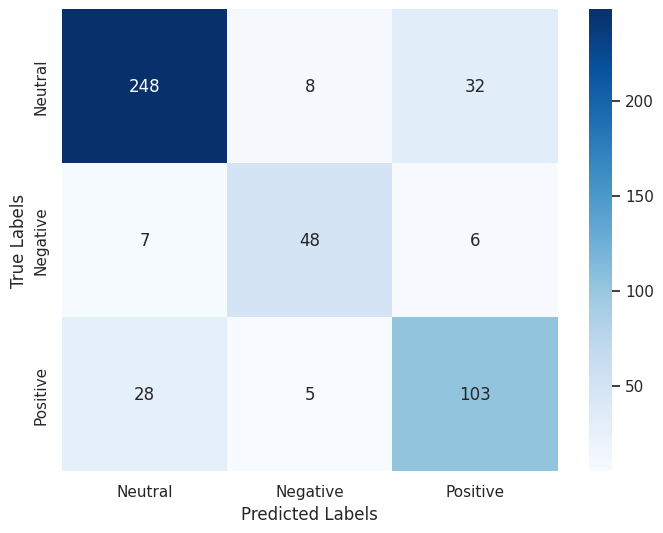

Confusion Matrix:
[[248   8  32]
 [  7  48   6]
 [ 28   5 103]]
F1 Score: 0.7997396816624719

Classification Report:
              precision    recall  f1-score   support

     neutral       0.88      0.86      0.87       288
    negative       0.79      0.79      0.79        61
    positive       0.73      0.76      0.74       136

    accuracy                           0.82       485
   macro avg       0.80      0.80      0.80       485
weighted avg       0.82      0.82      0.82       485



In [ ]:
# Calculate the confusion matrix
true_labels2= dataset_test2['label']    
conf_matrix2 = confusion_matrix(true_labels2, pred_labels2)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()


# Calculate the F1 score
f1 = f1_score(true_labels2, pred_labels2, average='macro')

# Print the results
print('Confusion Matrix:')
print(conf_matrix2)
print('F1 Score:', f1)


class_report = classification_report(true_labels2, pred_labels2, target_names=['neutral', 'negative', 'positive'])

print('\nClassification Report:')
print(class_report)

The performance of the model was evaluated using a confusion matrix, F1 score, and a classification report. The confusion matrix shows that the model has a high number of correct predictions across all classes, with particularly strong performance in predicting 'neutral' sentiments. 

The model's overall F1 score was 0.80, indicating a good balance between precision and recall. The classification report provides a more detailed view of this, showing high precision and recall scores for the 'neutral' class in particular. However, performance was slightly lower for the 'positive' class. Overall, the model achieved an accuracy of 82% on the test data, indicating a strong ability to correctly classify sentiment.


---




 The code below illustrates the creation of a dual-axis line graph using Python's Matplotlib library. It plots validation loss (in red) and validation accuracy (in blue) against the number of training epochs. The 'eval_loss' and 'eval_accuracy' values are extracted from the 'log_history' of a trainer object, presumably from a machine learning model. This visualization is useful for observing the performance and convergence of the model over time.

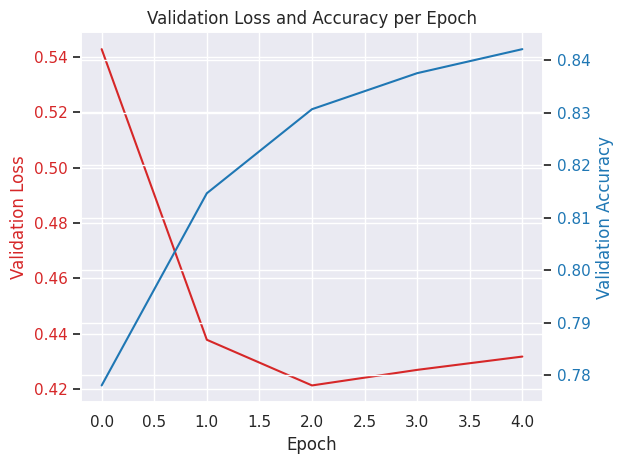

In [ ]:
#Plotting accuracy and loss
val_loss = []
val_accuracy = []
for elem in trainer2.state.log_history:
    if 'eval_loss' in elem.keys():
        val_loss.append(elem['eval_loss'])
        val_accuracy.append(elem['eval_accuracy'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(val_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(val_accuracy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Validation Loss and Accuracy per Epoch')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The graph shows that model is performing fairly good and is not overfitting or under performing. 

### save the fine-tuned model.

This line of code saves the trained model as *'finbert-sentiment'* to the directory "finbert-sentiment". This saved model can be later loaded and used for inference or further training.

In [ ]:
trainer2.save_model('finbert-sentiment')   